# Introdution to Artificial Neural Networks with Keras

In [1]:
# FIXME: meke autocompletion working again
%config Completer.use_jedi = False

## The Perceptron
**Forward step** is $h_{\mathbf{W}, \mathbf{b}} = \phi(\mathbf{X}\mathbf{W} + \mathbf{b})$ (assuming the addition is broadcasted).

**Learning step** is $w_{i,j}^{(\text{next})} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i$ where:
* $x_i$ is the $i$-th input
* $y_j$ is the $j$-th target
* $\hat{y}_j$ is the $j$-th predicted value
* $\eta$ is the learning rate

The learning is basically a gradient descent with constant learning rate and specific gradient.

It can be shown that for linearly separable dataset this algorightm converges and finds a separating hyper-plane.

In [2]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Load the IRIS dataset
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

# Train Perceptron with single unit
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

# Make a prediction
per_clf.predict([[2, 0.5]])

array([1])

## Activation functions

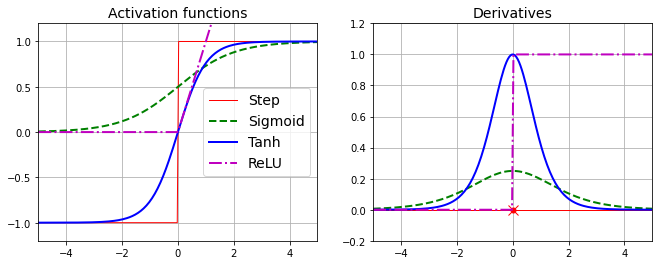

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

# Define the input space for activation functions
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

# Plot activation functions
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

# Plot first derivatives (approx.) of activation functions above
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

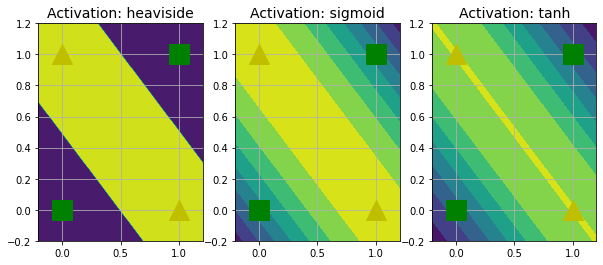

In [15]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

# Crate a space for the XOR problem
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

plt.figure(figsize=(10,4))

def plot_xor_activation(i, activation):
    # Plot contour of activation function on the XOR space
    plt.subplot(131 + i)
    plt.contourf(x1, x2, mlp_xor(x1, x2, activation))
    plt.plot([0, 1], [0, 1], "gs", markersize=20)
    plt.plot([0, 1], [1, 0], "y^", markersize=20)
    plt.title(f"Activation: {activation.__name__}", fontsize=14)
    plt.grid(True)

for i, activation in enumerate([heaviside, sigmoid, np.tanh]):
    plot_xor_activation(i, activation)

plt.show()